In [ ]:
import numpy as np

from utils import KNNImageImputer, MeanImageImputer
from utils import Missingness
from utils import get_device
from utils import get_raw_data
from utils import plot_dec_performance
from utils import run_dec_pipeline
from utils import plot_dec_performance_average
from utils import plot_experiment_results_average

In [ ]:
missingness = Missingness()
mean_imputer = MeanImageImputer()
knn_imputer = KNNImageImputer(k=5)

device = get_device()

corruption_type = 'row_missing'
num_rows_list = np.arange(0, 26, 2)

n_runs = 10

# Loading data

In [ ]:
tensor_x, labels, indices = get_raw_data('mnist', device=device)

# Imputing mean

In [ ]:
ari_knn_runs = []
nmi_knn_runs = []
acc_knn_runs = []

In [ ]:
for run in range(n_runs):
    print(f"\nRun: {run + 1}/{n_runs} ------")

    ari_knn = []
    nmi_knn = []
    acc_knn = []

    for num_rows in num_rows_list:
        corruption_kwargs = {
            'corruption_type': corruption_type,
            'num_rows': num_rows,
        }

        ari, nmi, acc = run_dec_pipeline(
            X_clean=tensor_x,
            y_true=labels,
            data_indices=indices,
            missingness=missingness,
            imputer=knn_imputer,
            device=device,
            ae_epochs=30,
            dec_epochs=70,
            **corruption_kwargs,
        )

        ari_knn.append(ari)
        nmi_knn.append(nmi)
        acc_knn.append(acc)

    ari_knn_runs.append(ari_knn)
    nmi_knn_runs.append(nmi_knn)
    acc_knn_runs.append(acc_knn)

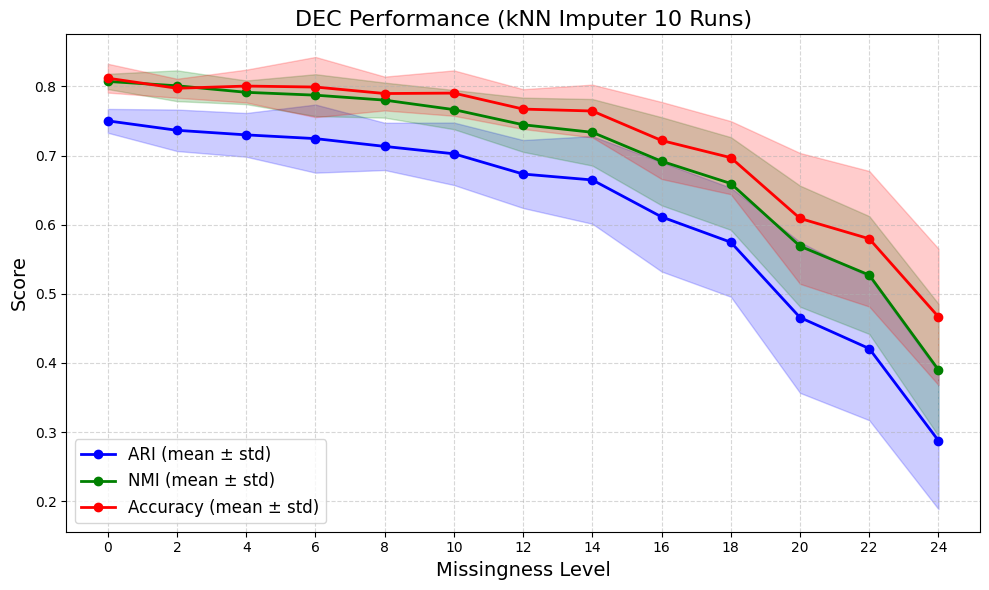

In [28]:
plot_dec_performance_average(
    missingness_percentages=num_rows_list,
    score_arrays=[ari_knn_runs, nmi_knn_runs, acc_knn_runs],
    labels=['ARI', 'NMI', 'Accuracy'],
    title='DEC Performance (kNN Imputer 10 Runs)'
)

# Mean imputation

In [ ]:
ari_mean_runs = []
nmi_mean_runs = []
acc_mean_runs = []

In [ ]:
for run in range(n_runs):
    print(f"\nRun: {run + 1}/{n_runs} ------")

    ari_mean = []
    nmi_mean = []
    acc_mean = []

    for num_rows in num_rows_list:
        corruption_kwargs = {
            'corruption_type': corruption_type,
            'num_rows': num_rows,
        }

        ari, nmi, acc = run_dec_pipeline(
            X_clean=tensor_x,
            y_true=labels,
            data_indices=indices,
            missingness=missingness,
            imputer=mean_imputer,
            device=device,
            ae_epochs=30,
            dec_epochs=70,
            **corruption_kwargs,
        )

        ari_mean.append(ari)
        nmi_mean.append(nmi)
        acc_mean.append(acc)

    ari_mean_runs.append(ari_mean)
    nmi_mean_runs.append(nmi_mean)
    acc_mean_runs.append(acc_mean)

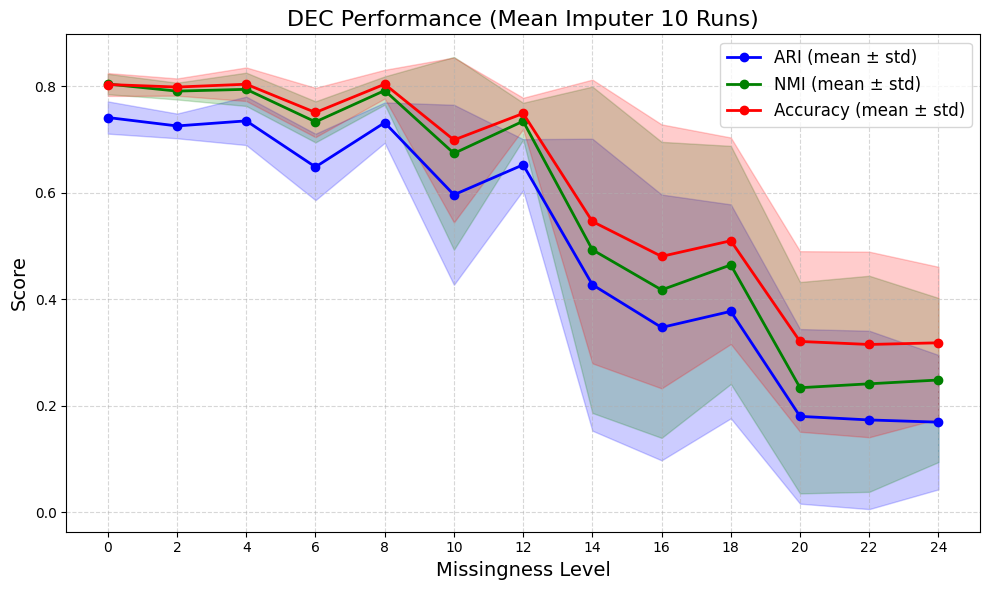

In [29]:
plot_dec_performance_average(
    missingness_percentages=num_rows_list,
    score_arrays=[ari_mean_runs, nmi_mean_runs, acc_mean_runs],
    labels=['ARI', 'NMI', 'Accuracy'],
    title='DEC Performance (Mean Imputer 10 Runs)'
)

# Denoising Autoencoder

In [ ]:
ari_dae_runs = []
nmi_dae_runs = []
acc_dae_runs = []

In [ ]:
for run in range(n_runs):
    print(f"\nRun: {run + 1}/{n_runs} ------")

    ari_dae = []
    nmi_dae = []
    acc_dae = []

    for num_rows in num_rows_list:
        corruption_kwargs = {
            'corruption_type': corruption_type,
            'num_rows': num_rows,
        }

        ari, nmi, acc = run_dec_pipeline(
            X_clean=tensor_x,
            y_true=labels,
            data_indices=indices,
            missingness=missingness,
            imputer=None,
            device=device,
            ae_epochs=30,
            dec_epochs=70,
            **corruption_kwargs,
        )

        ari_dae.append(ari)
        nmi_dae.append(nmi)
        acc_dae.append(acc)

    ari_dae_runs.append(ari_dae)
    nmi_dae_runs.append(nmi_dae)
    acc_dae_runs.append(acc_dae)

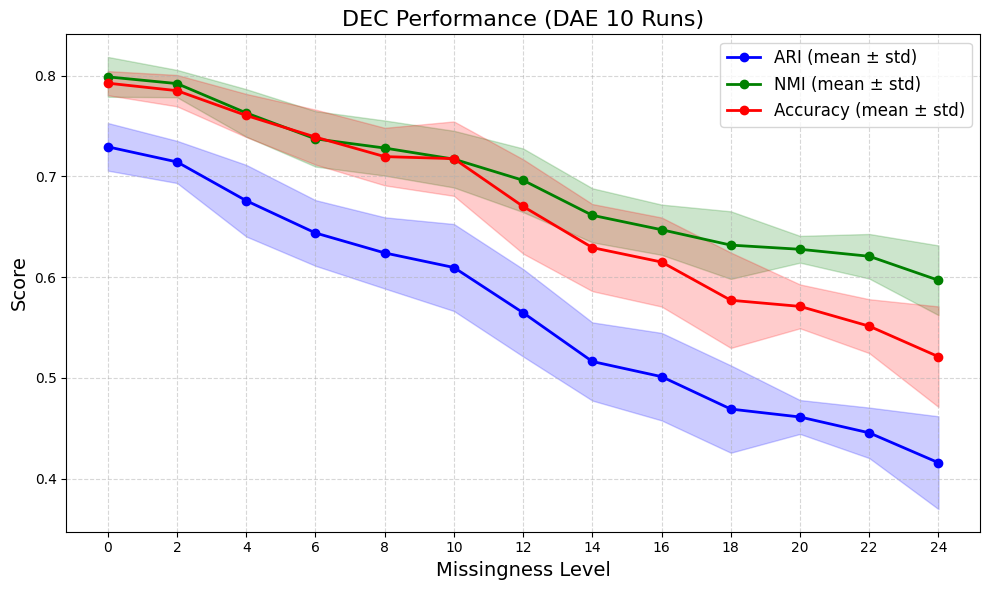

In [30]:
plot_dec_performance_average(
    missingness_percentages=num_rows_list,
    score_arrays=[ari_dae_runs, nmi_dae_runs, acc_dae_runs],
    labels=['ARI', 'NMI', 'Accuracy'],
    title='DEC Performance (DAE 10 Runs)'
)

# Plot results

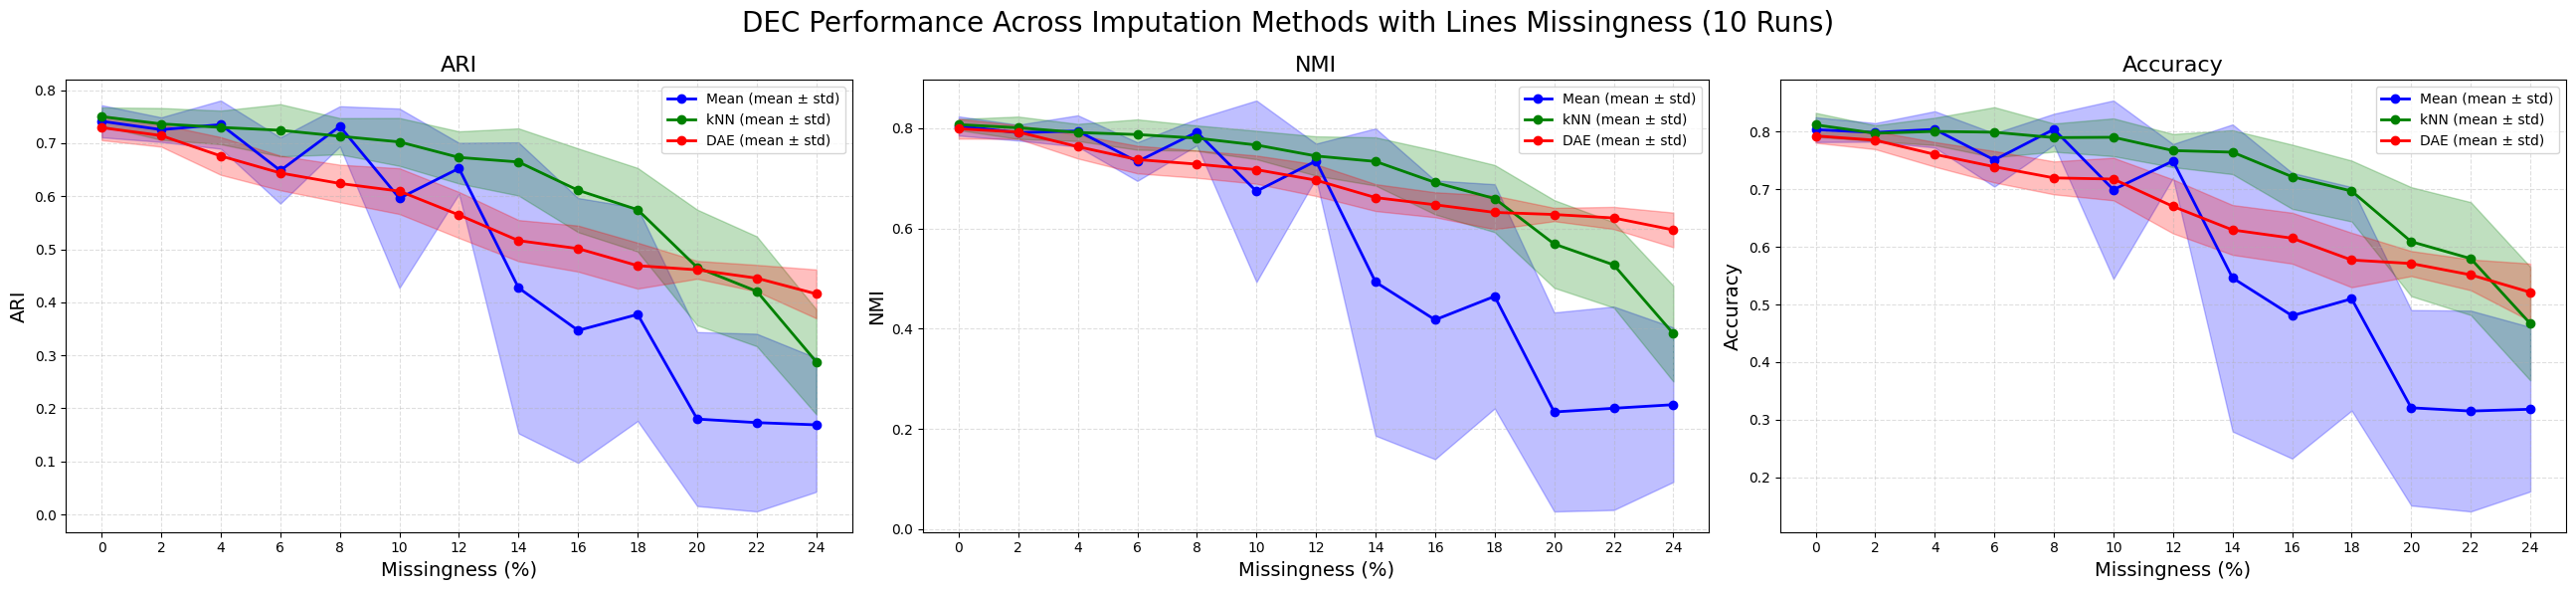

In [32]:
plot_experiment_results_average(
    num_rows_list,
    ari_mean_runs, ari_knn_runs, ari_dae_runs,
    nmi_mean_runs, nmi_knn_runs, nmi_dae_runs,
    acc_mean_runs, acc_knn_runs, acc_dae_runs,
    title="DEC Performance Across Imputation Methods with Lines Missingness (10 Runs)"
)